In [1]:
# Imports
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Inline
%matplotlib inline

In [33]:
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Style
sns.set_style('whitegrid')

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
# Check head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()
# Age and cabin nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


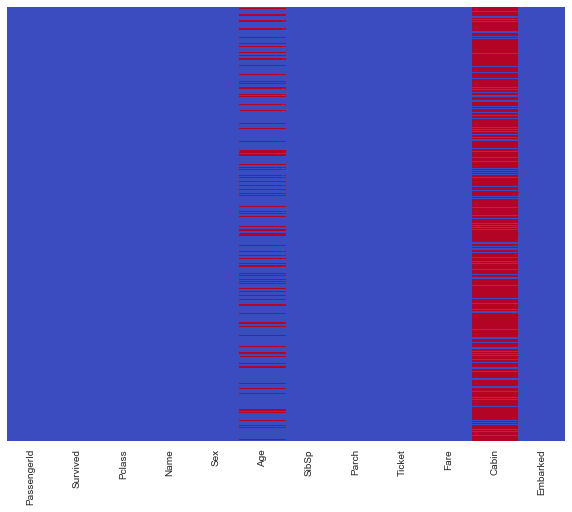

In [7]:
# Check for null
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')
# Some age information and lots of cabin info gone

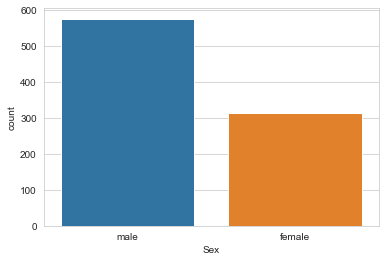

In [8]:
sns.countplot('Sex', data=train)

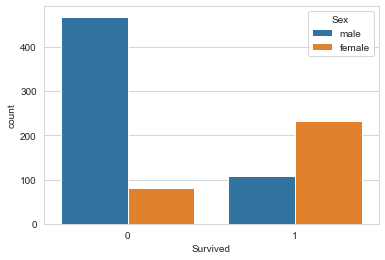

In [9]:
sns.countplot('Survived', hue='Sex', data=train)
# Men died more

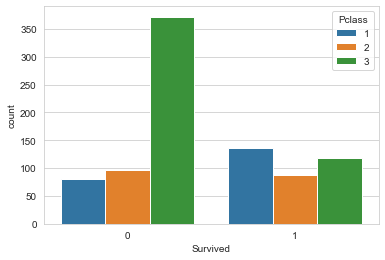

In [10]:
sns.countplot('Survived', hue='Pclass', data=train)
# Class 3 didn't survive

(0, 80)

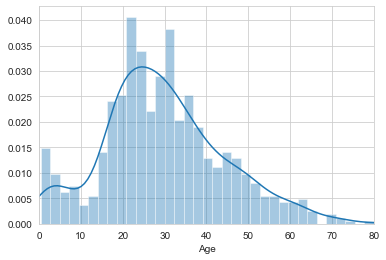

In [11]:
sns.distplot(train['Age'].dropna(), bins=35)
plt.xlim(0,80)

(0, 80)

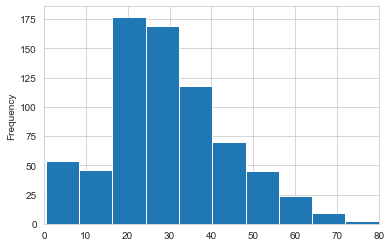

In [12]:
train.Age.plot.hist()
plt.xlim(0,80)

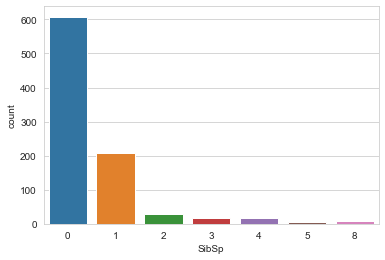

In [13]:
sns.countplot('SibSp', data=train)

(0, 500)

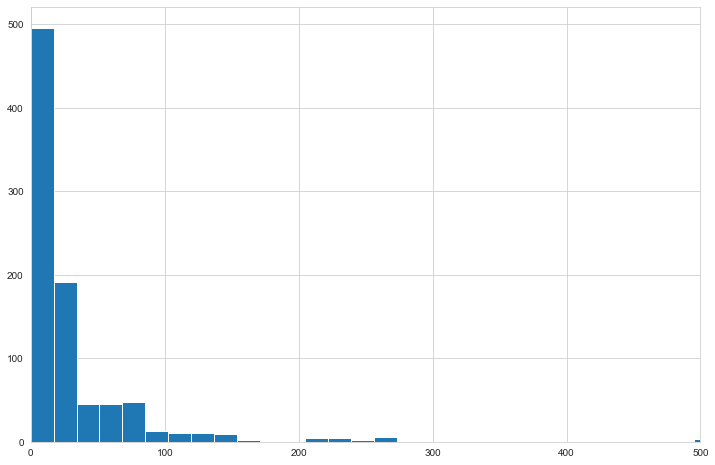

In [14]:
train['Fare'].hist(bins=30, figsize=(12,8))
plt.xlim(0,500)

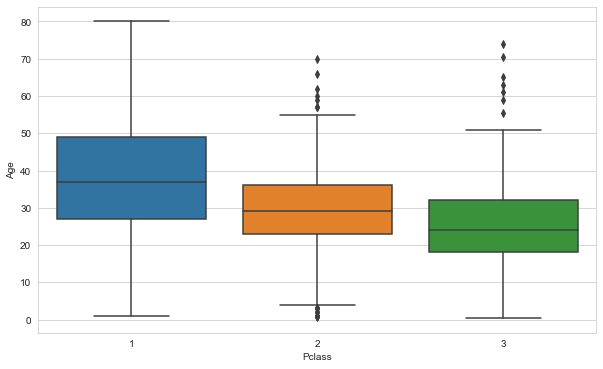

In [15]:
# Need to deal with missing age data
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [16]:
# train.loc[train['Pclass'] == 1]['Age'].mean()
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
# impute age
def impute(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return train.loc[train['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return train.loc[train['Pclass'] == 2]['Age'].mean()
        else:
            return train.loc[train['Pclass'] == 3]['Age'].mean()
    else:
        return Age

In [18]:
# His method
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
# train['Age'] = train[['Age', 'Pclass']].apply(impute, axis = 1)
train['Age'] = train[['Age', 'Pclass']].apply(impute, axis = 1)

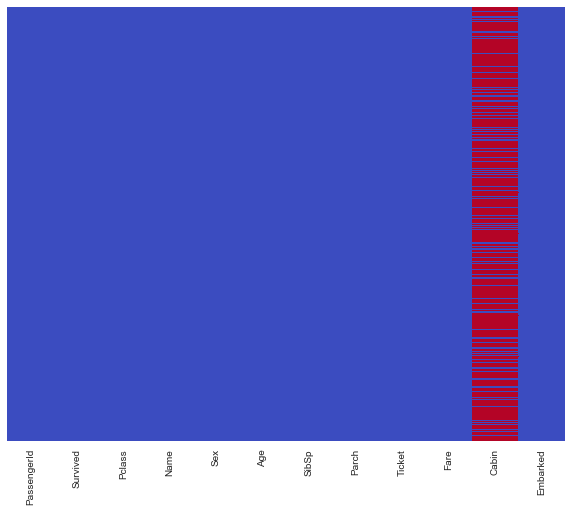

In [20]:
# Check for null
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [21]:
# Drop the cabin values
train.drop('Cabin', axis=1, inplace=True)

In [22]:
# few values in Embarked
train.dropna(inplace=True)

In [23]:
# change values
# From here: https://www.ritchieng.com/pandas-creating-dummy-variables/
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], prefix='Embarked',drop_first=True)

In [24]:
# Add to train
train = pd.concat([train, sex, embark], axis=1)

In [25]:
# Drop columns we don't need need anymore. Something like Natural Language Prcoessing may help
# Passanger is an index starting at 1
train.drop(['PassengerId','Name', 'Ticket','Sex', 'Embarked'], axis=1, inplace=True)

In [26]:
# Pclass dummy variables
# Training train as entire dataset
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [27]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [29]:
# Instantiate
logmodel = LogisticRegression(max_iter=1000)

In [30]:
# Train
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predictions
predictions = logmodel.predict(X_test)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [36]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 32  72]]
